In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import sklearn.metrics as metrics
from sklearn.linear_model import Ridge
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest
import random
from sklearn.feature_selection import SequentialFeatureSelector #Para stepwise
from sklearn.linear_model import RidgeCV, Ridge #Para Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')
random.seed(123)

In [14]:
hospital_df = pd.read_csv('risk_factors_cervical_cancer.csv', encoding='latin1')

hospital_df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [15]:
hospital_df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
hospital_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

### Obtenemos las variables numéricas

In [17]:
numerics_columns = hospital_df.select_dtypes(include=['int64'])
print(numerics_columns.columns.values)

['Age' 'STDs: Number of diagnosis' 'Dx:Cancer' 'Dx:CIN' 'Dx:HPV' 'Dx'
 'Hinselmann' 'Schiller' 'Citology' 'Biopsy']


### Contar la cantidad de campos numéricos

In [18]:
num_int64_columns = len(numerics_columns.columns.values)
print(num_int64_columns)

10


In [19]:
numeric_columns = ['Age', 'STDs: Number of diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 
                   'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']
numeric = hospital_df[numeric_columns]
numeric

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,0,0,0,0,0,0,0,0,0
1,15,0,0,0,0,0,0,0,0,0
2,34,0,0,0,0,0,0,0,0,0
3,52,0,1,0,1,0,0,0,0,0
4,46,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
853,34,0,0,0,0,0,0,0,0,0
854,32,0,0,0,0,0,0,0,0,0
855,25,0,0,0,0,0,0,0,1,0
856,33,0,0,0,0,0,0,0,0,0


In [20]:
null_counts = numeric.isnull().sum()
null_counts[null_counts > 0].count()

0

In [21]:
zero_counts = (numeric == 0).sum()
zero_counts[zero_counts > 0]

STDs: Number of diagnosis    787
Dx:Cancer                    840
Dx:CIN                       849
Dx:HPV                       840
Dx                           834
Hinselmann                   823
Schiller                     784
Citology                     814
Biopsy                       803
dtype: int64

In [22]:
zero_counts[zero_counts > 0].count()

9

In [23]:
zero_counts[zero_counts > 650]

STDs: Number of diagnosis    787
Dx:Cancer                    840
Dx:CIN                       849
Dx:HPV                       840
Dx                           834
Hinselmann                   823
Schiller                     784
Citology                     814
Biopsy                       803
dtype: int64

<Axes: >

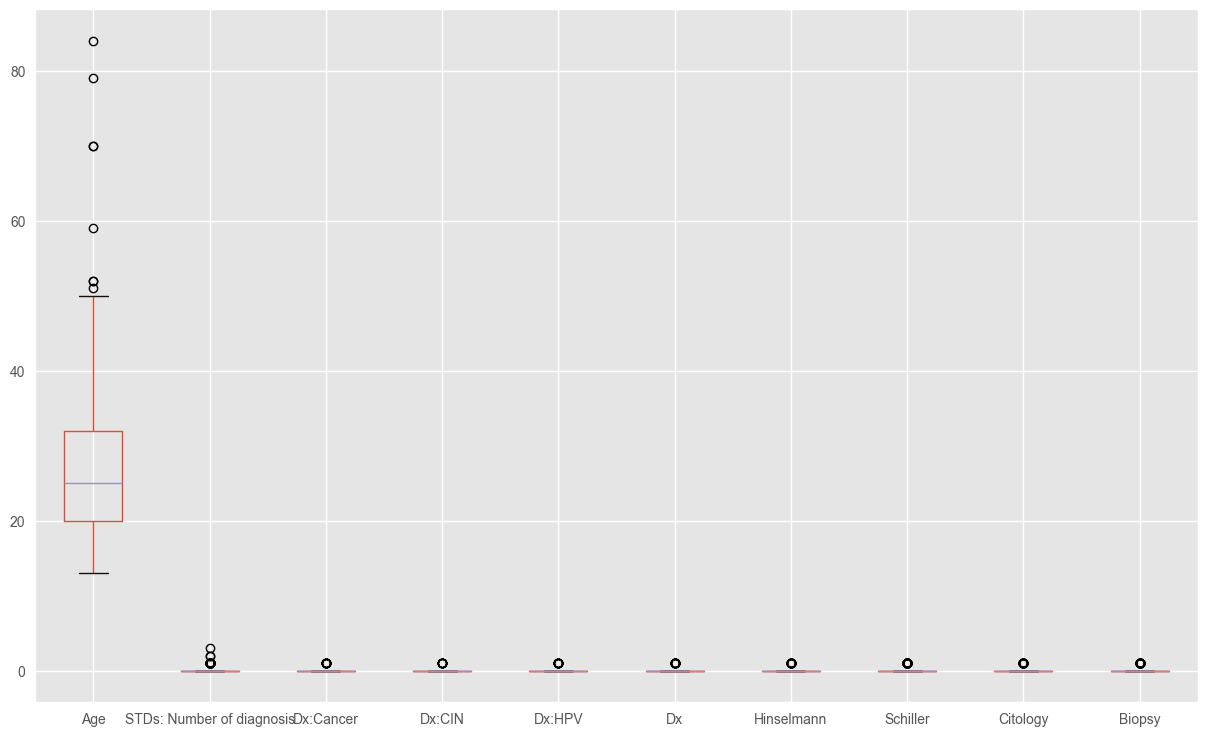

In [25]:
numeric.boxplot()

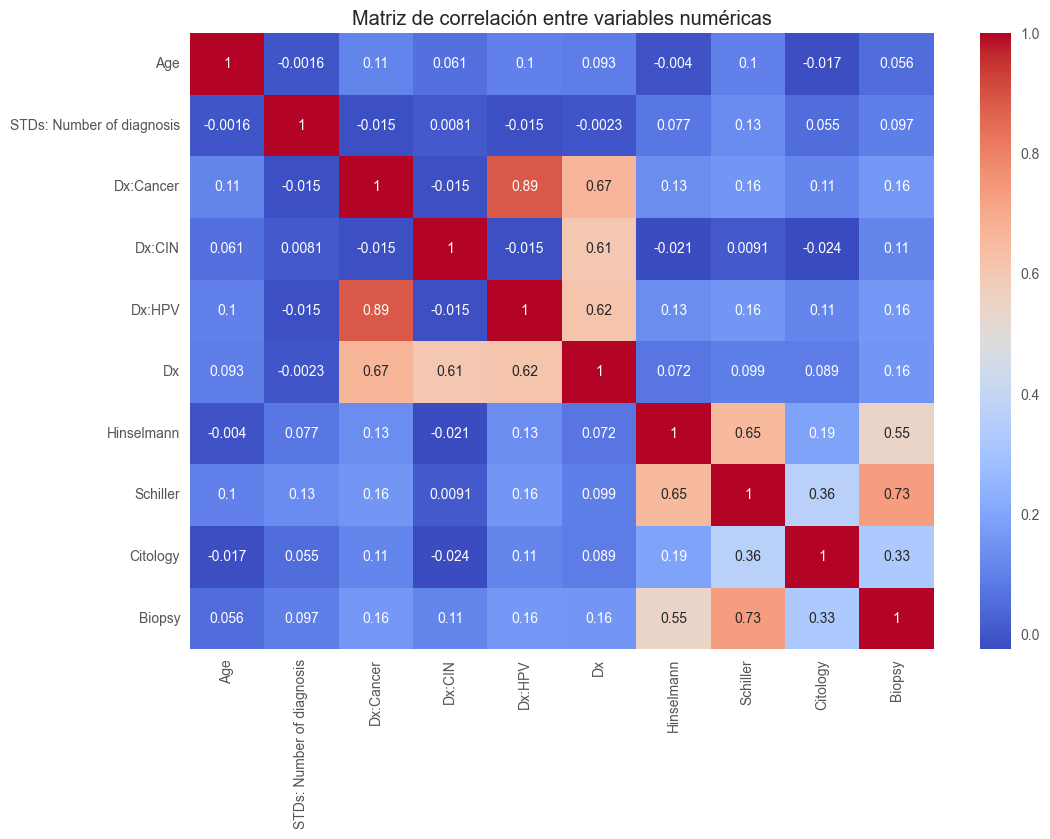

In [26]:
correlation_matrix = numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()